In [61]:
from pandas_datareader import data as pdr
import yfinance as yf
from arch.unitroot import VarianceRatio

import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

from scipy import stats

from statsmodels.graphics.api import qqplot

import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [62]:
data = pdr.get_data_yahoo('AAPL', '2015-01-01', '2019-12-31')
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,113.129997,110.209999,112.820000,110.379997,41403400.0,101.178932
2015-01-02,111.440002,107.349998,111.389999,109.330002,53204600.0,100.216454
2015-01-05,108.650002,105.410004,108.290001,106.250000,64285500.0,97.393181
2015-01-06,107.430000,104.629997,106.540001,106.260002,65797100.0,97.402374
2015-01-07,108.199997,106.699997,107.199997,107.750000,40105900.0,98.768150


## Adjustment of Data for Dividends/Splits etc

## Plotting Functions

In [63]:
def plot_line_data(data, xlabel_='', ylabel_='', title_='', figsize_=(13,7)):
    plt.figure(figsize=figsize_)
    plt.plot(data)
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.title(title_, fontsize='15')
    plt.tight_layout()

def plot_scatter_data(data, xlabel_='', ylabel_='', title_='', marker_size=1, figsize_=(13,7)):
    plt.figure(figsize=figsize_)
    plt.scatter(data.index, data.values, s=marker_size)
    plt.xlabel(xlabel_)
    plt.ylabel(ylabel_)
    plt.title(title_, fontsize='15')
    plt.tight_layout()
    
def plot_histogram(data, bins_=50, title_='', figsize_=(13,7)):
    data.hist(bins=bins_, figsize=figsize_)
    plt.title(title_, fontsize='15')
    plt.xlabel('Returns (%)', fontsize='15')

## Closing Price Plot for AAPL

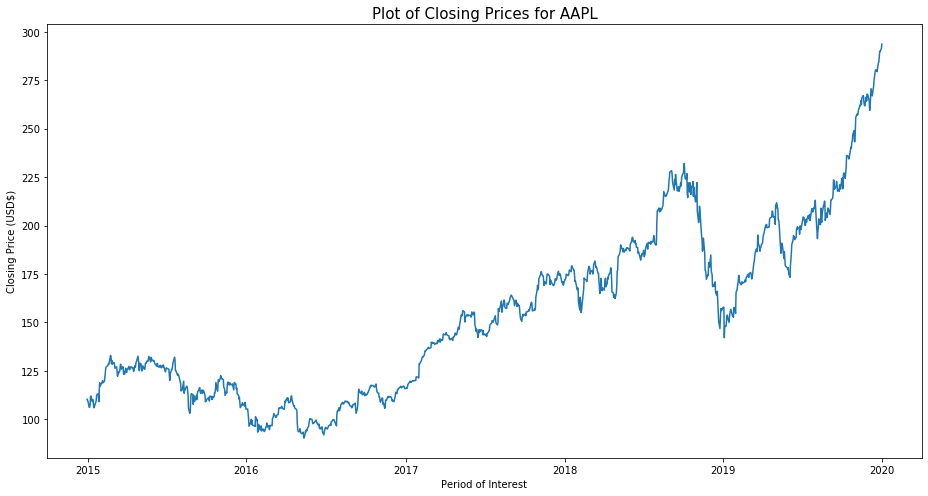

In [64]:
## Plot Adjusted Close Price vs Date
plot_line_data(data['Close'], 
               xlabel_='Period of Interest', 
               ylabel_='Closing Price (USD$)',
               title_='Plot of Closing Prices for AAPL')

## Open-Close Descriptive Statistics

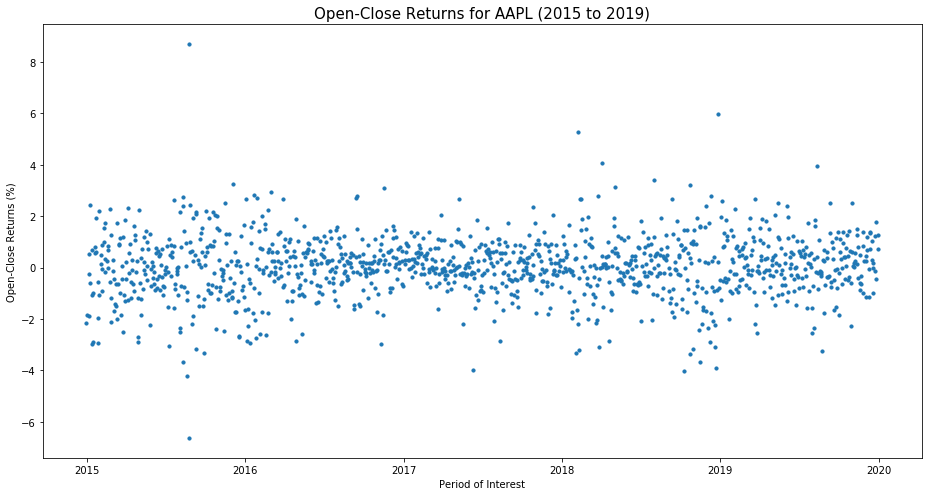

In [65]:
## Plot close-close returns data 
# No adjustment is needed since within same row
OpenCloseData = (data['Close'] - data['Open']) / data['Open']

plot_scatter_data(100*OpenCloseData, 
                  xlabel_='Period of Interest', 
                  ylabel_='Open-Close Returns (%)',
                  title_='Open-Close Returns for AAPL (2015 to 2019)',
                  marker_size=10)

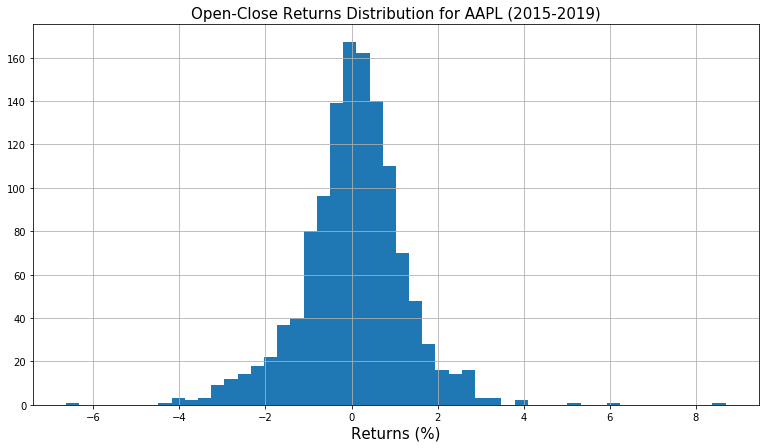

In [66]:
plot_histogram(100*OpenCloseData, title_='Open-Close Returns Distribution for AAPL (2015-2019)')

In [69]:
print("Open-Close Returns Distribution\n")
print(f"Standard Deviation (%): {100*OpenCloseData.std():f}")
print(f"Skewness: {OpenCloseData.skew():f}")
print(f"Kurtosis: {OpenCloseData.kurtosis():f}")

Open-Close Returns Distribution

Standard Deviation (%): 1.204359
Skewness: 0.050079
Kurtosis: 3.933730


## Close-Open Descriptive Statistics

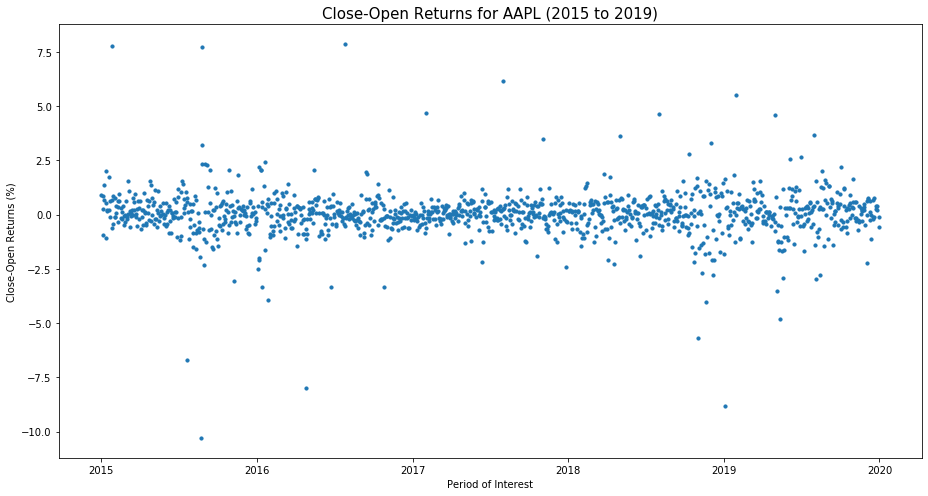

In [70]:
## Plot close-open returns data (with adjustedData)
# Shift adjusted data one row forward for Open Prices and remove the last row of NaN
CloseOpenData = ((data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1))[1:]

plot_scatter_data(100*CloseOpenData, 
                  xlabel_='Period of Interest', 
                  ylabel_='Close-Open Returns (%)',
                  title_='Close-Open Returns for AAPL (2015 to 2019)',
                  marker_size=10)

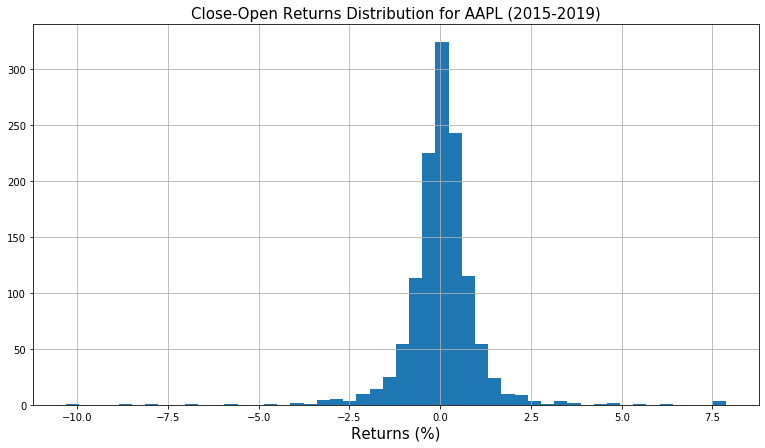

In [71]:
plot_histogram(100*CloseOpenData, title_='Close-Open Returns Distribution for AAPL (2015-2019)')

In [72]:
print("Close-Open Returns Distribution\n")
print(f"Standard Deviation (%): {100*CloseOpenData.std():f}")
print(f"Skewness: {CloseOpenData.skew():f}")
print(f"Kurtosis: {CloseOpenData.kurtosis():f}")

Close-Open Returns Distribution

Standard Deviation (%): 1.079702
Skewness: -0.682468
Kurtosis: 22.631304


## Close-Close Descriptive Statistics

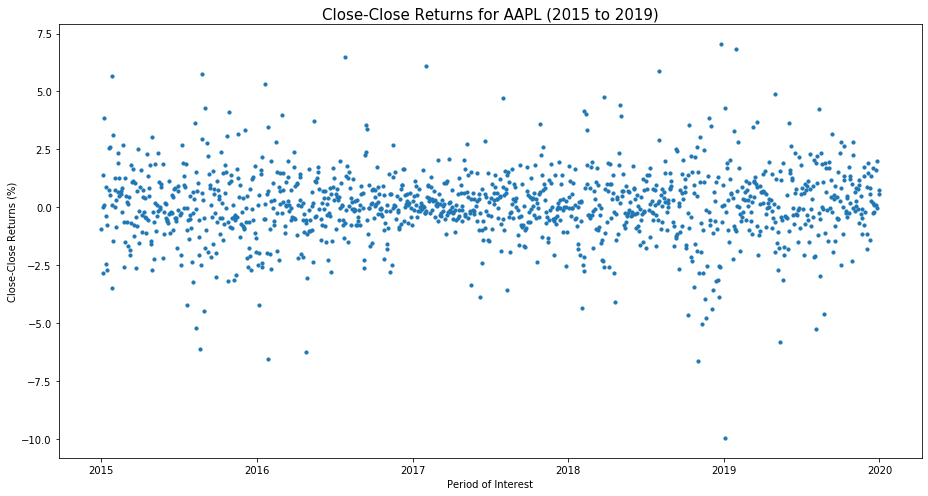

In [73]:
## Plot close-close returns data (with adjustedData)
# A shift is necessary to ensure vector operations occurs in the correct rows (1st row is sliced off)
CloseCloseData = ((data['Close'] - data['Close'].shift(1)) / data['Close'].shift(1))[1:]

plot_scatter_data(100*CloseCloseData, 
                  xlabel_='Period of Interest', 
                  ylabel_='Close-Close Returns (%)',
                  title_='Close-Close Returns for AAPL (2015 to 2019)',
                  marker_size=10)

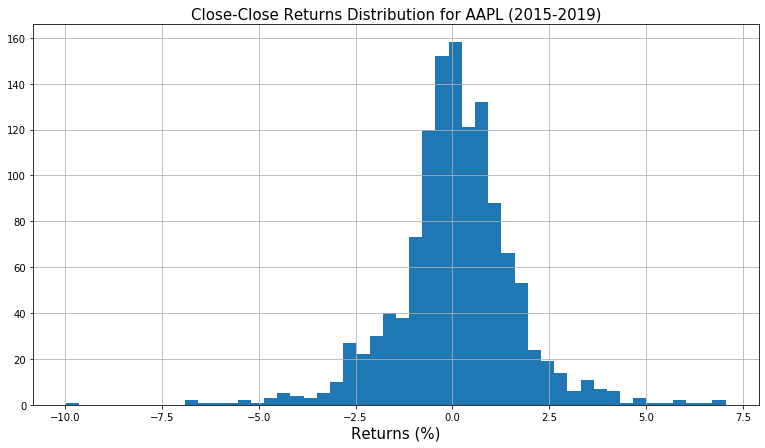

In [74]:
plot_histogram(100*CloseCloseData, title_='Close-Close Returns Distribution for AAPL (2015-2019)')

In [75]:
print("Close-Close Returns Distribution\n")
print(f"Standard Deviation (%): {100*CloseCloseData.std():f}")
print(f"Skewness: {CloseCloseData.skew():f}")
print(f"Kurtosis: {CloseCloseData.kurtosis():f}")

Close-Close Returns Distribution

Standard Deviation (%): 1.565866
Skewness: -0.229442
Kurtosis: 3.804764


## Variance Ratio Test

In [76]:
## https://arch.readthedocs.io/en/latest/unitroot/unitroot_examples.html#Variance-Ratio-Testing

for i in [1,2,4,8,16,32]:
    lenData = len(CloseCloseData) // i
    print(f"\n**************** For 1/{i} Result ****************\n")
    print(VarianceRatio(CloseCloseData[:lenData], lenData-2).summary().as_text())
    print('\n************************************************\n')


**************** For 1/1 Result ****************

     Variance-Ratio Test Results     
Test Statistic                 -0.651
P-value                         0.515
Lags                             1256
-------------------------------------

Computed with overlapping blocks (de-biased)

************************************************


**************** For 1/2 Result ****************

     Variance-Ratio Test Results     
Test Statistic                 -0.261
P-value                         0.794
Lags                              627
-------------------------------------

Computed with overlapping blocks (de-biased)

************************************************


**************** For 1/4 Result ****************

     Variance-Ratio Test Results     
Test Statistic                 -0.549
P-value                         0.583
Lags                              312
-------------------------------------

Computed with overlapping blocks (de-biased)

************************************

## Dicky-Fuller GLS Testing

In [77]:
from arch.unitroot import DFGLS

dfgls = DFGLS(CloseCloseData, max_lags=1)

print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                -17.555
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.58 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Augmented Dickey-Fuller Test

In [78]:
from arch.unitroot import ADF

adf = ADF(CloseCloseData, lags=1, trend='nc')

print(adf.summary().as_text())

regressADF = adf.regression

   Augmented Dickey-Fuller Results   
Test Statistic                -26.217
P-value                         0.000
Lags                                1
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [79]:
print(regressADF.summary().as_text())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.497
Model:                            OLS   Adj. R-squared (uncentered):              0.496
Method:                 Least Squares   F-statistic:                              618.8
Date:                Sun, 15 Mar 2020   Prob (F-statistic):                   1.11e-187
Time:                        13:43:21   Log-Likelihood:                          3439.5
No. Observations:                1256   AIC:                                     -6875.
Df Residuals:                    1254   BIC:                                     -6865.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

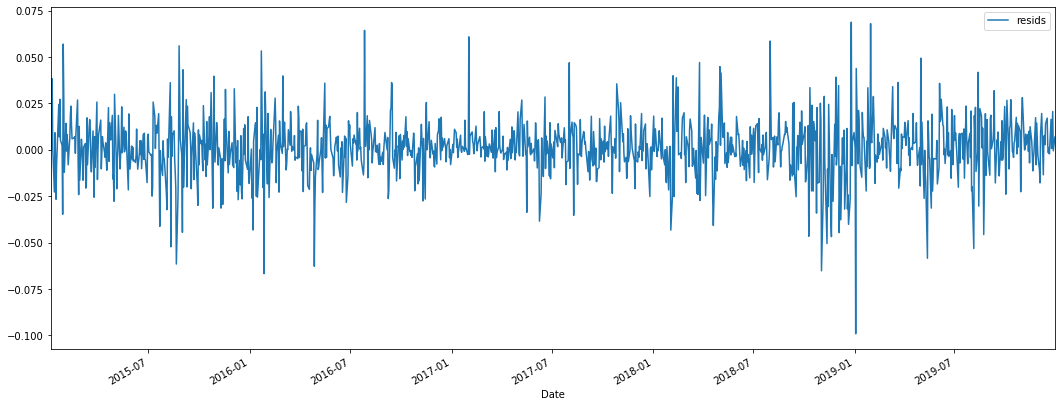

In [80]:
## Deduct residual data by the number of lags above
resids = pd.DataFrame(regressADF.resid)
resids.index = CloseCloseData.index[int(regressADF.df_model):]
resids.columns = ['resids']
fig = resids.plot(figsize=(18,7))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


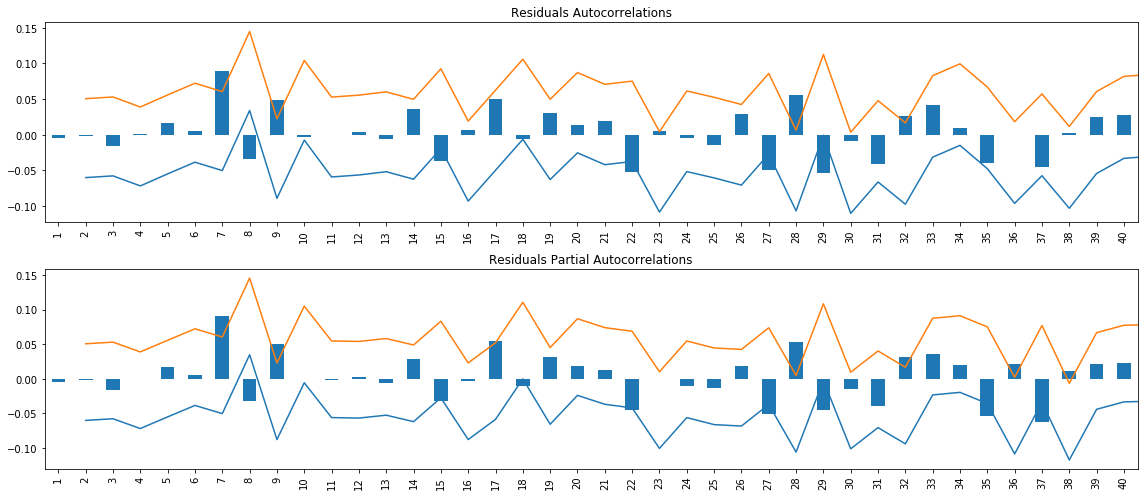

In [81]:
fig = plt.figure(figsize=(30,10))

confid_label = ['Lower Confidence', 'Upper Confidence']

ax1 = fig.add_subplot(211)
acf = sm.tsa.stattools.acf(regressADF.resid, alpha=0.05)
acf = pd.concat([pd.DataFrame(acf[0], columns=['ACF']), pd.DataFrame(acf[1], columns=confid_label)], axis=1)
fig1 = acf['ACF'][1:].plot(kind='bar', title='Residuals Autocorrelations', figsize=(16,7), ax=ax1)
fig1 = fig1.plot(acf[1:][confid_label], label=confid_label)

ax2 = fig.add_subplot(212)
pacf = sm.tsa.stattools.pacf(regressADF.resid, alpha=0.05)
pacf = pd.concat([pd.DataFrame(pacf[0], columns=['PACF']), pd.DataFrame(pacf[1], columns=confid_label)], axis=1)
fig2 = pacf['PACF'][1:].plot(kind='bar', title='Residuals Partial Autocorrelations', figsize=(16,7), ax=ax2)
fig2 = fig2.plot(pacf[1:][confid_label], label=confid_label)

plt.tight_layout()

## ACF/PACF

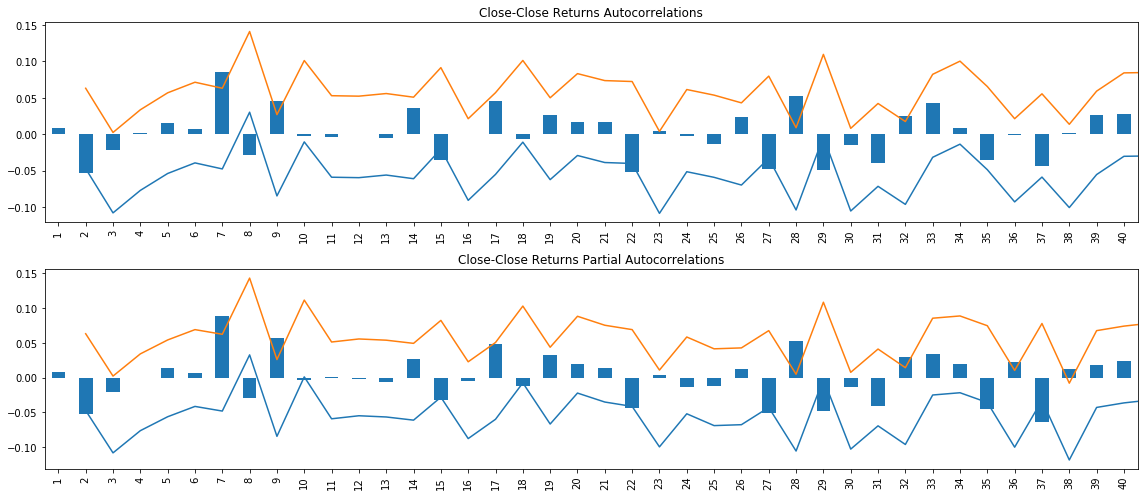

In [82]:
fig = plt.figure(figsize=(30,10))

confid_label = ['Lower Confidence', 'Upper Confidence']

ax1 = fig.add_subplot(211)
acf = sm.tsa.stattools.acf(CloseCloseData, alpha=0.05)
acf = pd.concat([pd.DataFrame(acf[0], columns=['ACF']), pd.DataFrame(acf[1], columns=confid_label)], axis=1)
fig1 = acf['ACF'][1:].plot(kind='bar', title='Close-Close Returns Autocorrelations', figsize=(16,7), ax=ax1)
fig1 = fig1.plot(acf[1:][confid_label], label=confid_label)

ax2 = fig.add_subplot(212)
pacf = sm.tsa.stattools.pacf(CloseCloseData, alpha=0.05)
pacf = pd.concat([pd.DataFrame(pacf[0], columns=['PACF']), pd.DataFrame(pacf[1], columns=confid_label)], axis=1)
fig2 = pacf['PACF'][1:].plot(kind='bar', title='Close-Close Returns Partial Autocorrelations', figsize=(16,7), ax=ax2)
fig2 = fig2.plot(pacf[1:][confid_label], label=confid_label)

plt.tight_layout()

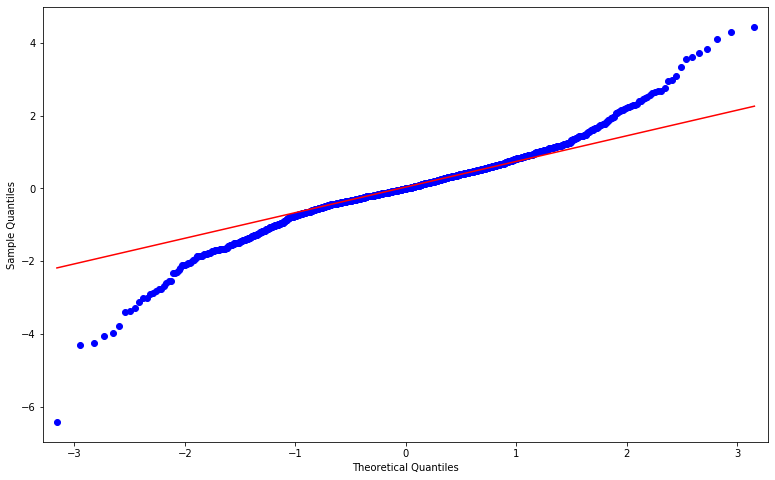

In [83]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
fig = qqplot(CloseCloseData, line='q', ax=ax, fit=True)

## ARMA

In [166]:
# import statsmodels.tsa.api as smt

# number of samples to discard before fit
burn = 500 
mdl = smt.ARMA(CloseCloseData, order=(1,0)).fit(method='mle', trend='nc', burnin=burn)
print(mdl.summary().as_text())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1258
Model:                     ARMA(1, 0)   Log Likelihood                3442.641
Method:                           mle   S.D. of innovations              0.016
Date:                Sun, 15 Mar 2020   AIC                          -6881.283
Time:                        17:39:52   BIC                          -6871.008
Sample:                             0   HQIC                         -6877.421
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.Close     0.0111      0.028      0.395      0.693      -0.044       0.066
                                    Roots                                    
                  Real          Imaginary         

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [167]:
sm.stats.durbin_watson(mdl.resid.values)

1.99842427553798

In [168]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

# Specify DDOF=1 to account for p+q parameters estimation
dict(zip(labels, sm.stats.diagnostic.het_arch(mdl.resid.values, ddof=1)))

{'LM Statistic': 88.5494373942338,
 'LM-Test p-value': 1.2436594290832183e-09,
 'F-Statistic': 4.066743503519572,
 'F-Test p-value': 5.069072401468157e-10}

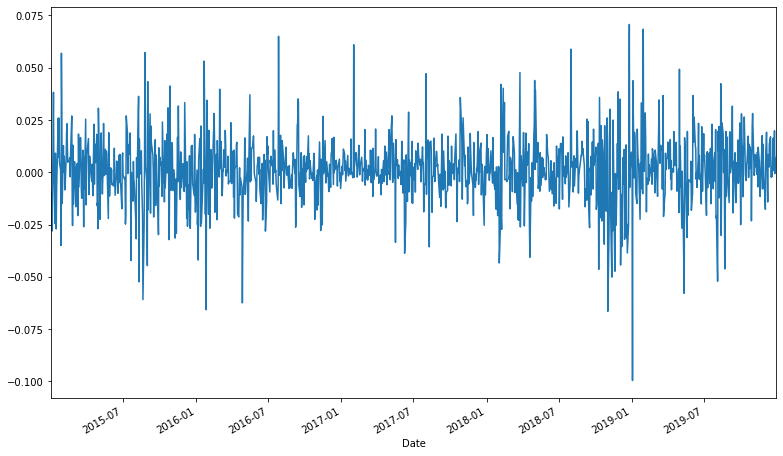

In [169]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
ax = mdl.resid.plot(ax=ax);

In [171]:
stats.normaltest(mdl.resid)

NormaltestResult(statistic=126.3498949918164, pvalue=3.659897376911966e-28)

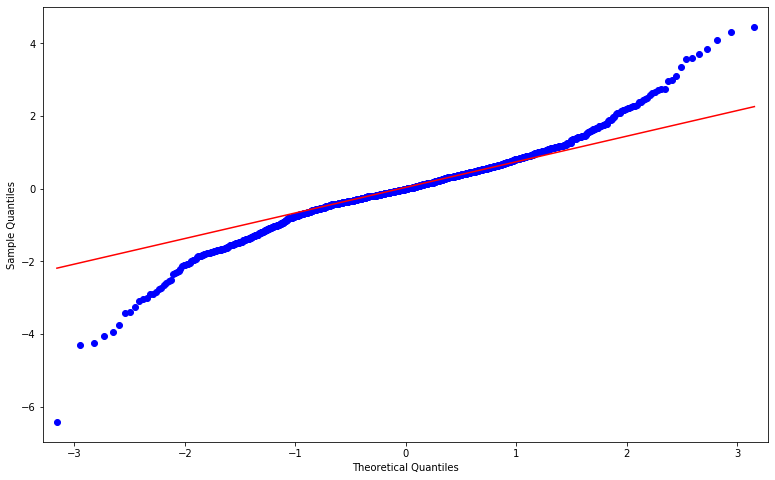

In [172]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
fig = qqplot(mdl.resid, line='q', ax=ax, fit=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


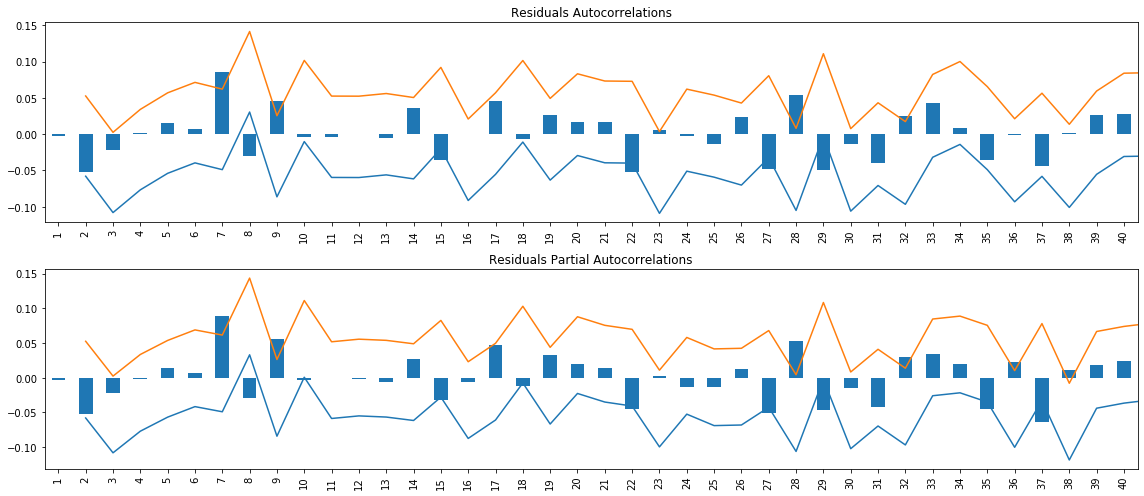

In [173]:
fig = plt.figure(figsize=(30,10))

confid_label = ['Lower Confidence', 'Upper Confidence']

ax1 = fig.add_subplot(211)
acf = sm.tsa.stattools.acf(mdl.resid.values.squeeze(), alpha=0.05)
acf = pd.concat([pd.DataFrame(acf[0], columns=['ACF']), pd.DataFrame(acf[1], columns=confid_label)], axis=1)
fig1 = acf['ACF'][1:].plot(kind='bar', title='Residuals Autocorrelations', figsize=(16,7), ax=ax1)
fig1 = fig1.plot(acf[1:][confid_label], label=confid_label)

ax2 = fig.add_subplot(212)
pacf = sm.tsa.stattools.pacf(mdl.resid.values.squeeze(), alpha=0.05)
pacf = pd.concat([pd.DataFrame(pacf[0], columns=['PACF']), pd.DataFrame(pacf[1], columns=confid_label)], axis=1)
fig2 = pacf['PACF'][1:].plot(kind='bar', title='Residuals Partial Autocorrelations', figsize=(16,7), ax=ax2)
fig2 = fig2.plot(pacf[1:][confid_label], label=confid_label)

plt.tight_layout()

In [174]:
r,q,p = sm.tsa.acf(mdl.resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.002690   0.009127  0.923888
2.0  -0.052770   3.523355  0.171757
3.0  -0.021302   4.096499  0.251231
4.0   0.001471   4.099234  0.392743
5.0   0.015865   4.417637  0.490978
6.0   0.006565   4.472198  0.613051
7.0   0.085942  13.830654  0.054277
8.0  -0.030464  15.007499  0.059000
9.0   0.045658  17.653068  0.039419
10.0 -0.003604  17.669561  0.060800
11.0 -0.003721  17.687159  0.089129
12.0 -0.000059  17.687164  0.125525
13.0 -0.005582  17.726827  0.168170
14.0  0.035892  19.368309  0.151348
15.0 -0.035257  20.953431  0.138324
16.0  0.000785  20.954218  0.180277
17.0  0.045254  23.569937  0.131599
18.0 -0.007021  23.632950  0.167424
19.0  0.026852  24.555349  0.175705
20.0  0.016861  24.919367  0.204533
21.0  0.016452  25.266219  0.235818
22.0 -0.052748  28.834329  0.149652
23.0  0.005503  28.873197  0.184551
24.0 -0.002741  28.882850  0.224571
25.0 -0.013673  29.123170  0.258800
26.0  0.023980  29.862999  0

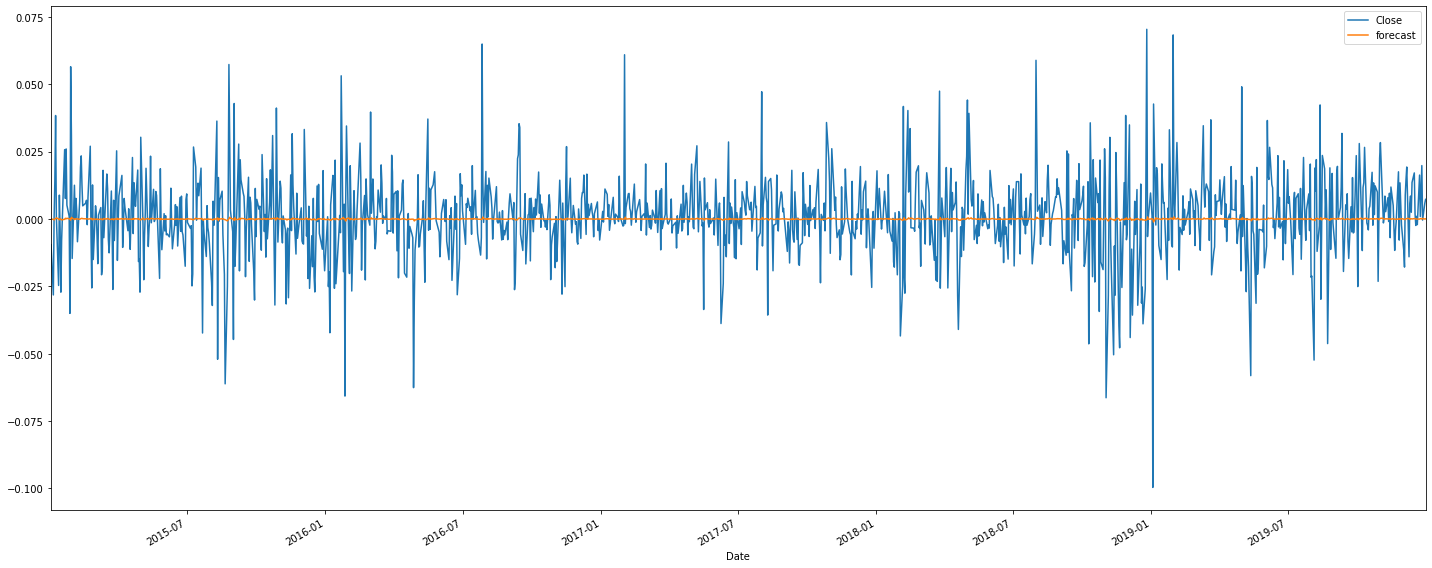

In [175]:
fig, ax = plt.subplots(figsize=(20, 8))

ax = CloseCloseData.loc['2015-01-02':].plot(ax=ax)

fig = mdl.plot_predict(dynamic=False, ax=ax, plot_insample=False)

plt.tight_layout()

## Forecast

In [199]:
def mean_forecast_err(y, yhat):
    return abs(y.sub(yhat)).mean()

In [200]:
## Seen Data
predict_AAPL_price =  mdl.predict('2015-01-06', '2019-12-31', dynamic=True)

mean_forecast_err(CloseCloseData, predict_AAPL_price)

0.011035488914555901

In [198]:
abs(CloseCloseData).mean()

0.0110476478653524

In [201]:
## Unseen Data
unseenData = pdr.get_data_yahoo('AAPL', '2020-01-01', '2020-01-31')
unseenData.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,293.679993,289.519989,289.929993,293.649994,25201400,292.954712
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100,299.638885
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700,296.725769
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800,299.090149
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000,297.683533


In [202]:
unseenCloseCloseData = ((unseenData['Close'] - unseenData['Close'].shift(1)) / unseenData['Close'].shift(1))[1:]
unseenCloseCloseData

Date
2020-01-02    0.022816
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
2020-01-10    0.002261
2020-01-13    0.021364
2020-01-14   -0.013503
2020-01-15   -0.004286
2020-01-16    0.012526
2020-01-17    0.011071
2020-01-21   -0.006777
2020-01-22    0.003570
2020-01-23    0.004816
2020-01-24   -0.002882
2020-01-27   -0.029405
2020-01-28    0.028289
2020-01-29    0.020932
2020-01-30   -0.001449
2020-01-31   -0.044339
Name: Close, dtype: float64

In [203]:
## Seen Data
predict_AAPL_price_unseen =  mdl.predict(start=len(CloseCloseData), end=len(CloseCloseData)+20)

forecastErr = abs(unseenCloseCloseData.values - predict_AAPL_price_unseen.values).mean()
forecastErr

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.013806031392064303

## GARCH Model

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2285.715208310487
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2284.2491437604485
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2282.8830007611314
Iteration:      4,   Func. Count:     31,   Neg. LLF: 2282.846859553011
Iteration:      5,   Func. Count:     38,   Neg. LLF: 2282.460726072439
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2282.4227033556035
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2282.2823946878248
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2282.281444278975
Iteration:      9,   Func. Count:     64,   Neg. LLF: 2282.281413187576
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2282.2814084490547
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2282.281408449176
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -2282.28
Distribution:                  Normal   AIC:                           4572.56
Method:            Maximum Likelihood   BIC:                           4593.11
                                        No. Observations:                 1258
Date:                Sun, Mar 15 2020   Df Residuals:                     1254
Time:                        12:22:46   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1662  4.216e-02      3.941  8.100e-05 [8.353e-02,  0.249]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1926  6.747e-02      2.855  4.303e-03 [6.039e-02,  0.325]
alpha[1]       0.1208  3.251e-02      3.715  2.033e-04 [5.705e-02,  0.184]
beta[1]        0.8037  4.318e-02     18.613  2.538e-77   [  0.719,  0.888]
==========================================================================

Covariance estimator: robust
"""

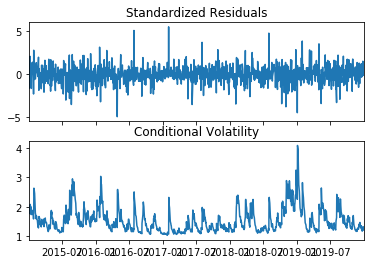

In [38]:
from arch import arch_model

## Basic GARCH(1,1) with mean
am = arch_model(100*CloseCloseData)
res = am.fit()
res.plot()
res.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2291.965093482344
Iteration:      2,   Func. Count:     12,   Neg. LLF: 2291.5308947673693
Iteration:      3,   Func. Count:     18,   Neg. LLF: 2291.180965239822
Iteration:      4,   Func. Count:     25,   Neg. LLF: 2291.1688077000126
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2291.1377430165785
Iteration:      6,   Func. Count:     36,   Neg. LLF: 2291.0454773734273
Iteration:      7,   Func. Count:     41,   Neg. LLF: 2291.005000578957
Iteration:      8,   Func. Count:     46,   Neg. LLF: 2291.003764660295
Iteration:      9,   Func. Count:     51,   Neg. LLF: 2291.003754678094
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2291.003754677823
            Iterations: 9
            Function evaluations: 51
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -2291.00
Distribution:                  Normal   AIC:                           4588.01
Method:            Maximum Likelihood   BIC:                           4603.42
                                        No. Observations:                 1258
Date:                Sun, Mar 15 2020   Df Residuals:                     1255
Time:                        12:23:51   Df Model:                            3
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1920  7.226e-02      2.657  7.892e-03 [5.034e-02,  0.334]
alpha[1]       0.1030  2.894e-02      3.558  3.743e-04 [4.624e-02,  0.160]
beta[1]        0.8199  4.440e-02     18.464  3.998e-76   [  0.733,  0.907]
==========================================================================

Covariance estimator: robust
"""

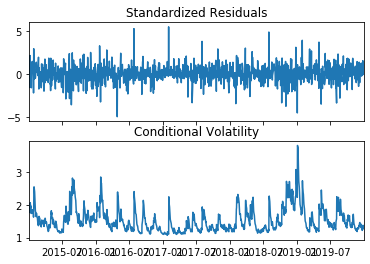

In [43]:
## Basic GARCH(1,1) with no mean
am = arch_model(100*CloseCloseData, mean='zero')
res = am.fit()
res.plot()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2209.2630970701302
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2208.3575342687927
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2198.925795152276
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2198.7200229336154
Iteration:      5,   Func. Count:     44,   Neg. LLF: 2196.6822532195465
Iteration:      6,   Func. Count:     51,   Neg. LLF: 2194.3823351791516
Iteration:      7,   Func. Count:     59,   Neg. LLF: 2191.859068133379
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2189.7207325108857
Iteration:      9,   Func. Count:     75,   Neg. LLF: 2189.1583373907292
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2188.9810030708004
Iteration:     11,   Func. Count:     91,   Neg. LLF: 2188.869302008873
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2188.812826628155
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2188.809742652827
Iteration:     14,   Func. Count:    113,   Neg. LLF: 21

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - TARCH/ZARCH Model Results                        
====================================================================================
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -2188.81
Distribution:      Standardized Student's t   AIC:                           4387.62
Method:                  Maximum Likelihood   BIC:                           4413.31
                                              No. Observations:                 1258
Date:                      Sun, Mar 15 2020   Df Residuals:                     1253
Time:                              12:23:54   Df Model:                            5
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0788  2.471e-02      3.188  1.434e-03    [3.034e-02,  0.127]
alpha[1]       0.0102  2.116e-02      0.482      0.630 [-3.127e-02,5.168e-02]
gamma[1]       0.1724  3.263e-02      5.284  1.263e-07      [  0.108,  0.236]
beta[1]        0.8846  2.641e-02     33.492 6.283e-246      [  0.833,  0.936]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.4309      0.551      8.045  8.609e-16 [  3.351,  5.510]
========================================================================

Covariance estimator: robust
"""

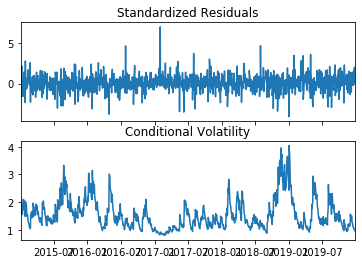

In [44]:
## TARCH with no mean
am = arch_model(100*CloseCloseData, mean='zero', p=1, o=1, q=1, power=1.0, dist='StudentsT')
res = am.fit()
res.plot()
res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2203.2798856163868
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2203.080240864687
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2197.3448873688676
Iteration:      4,   Func. Count:     40,   Neg. LLF: 2193.2023399379977
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2193.0078456302062
Iteration:      6,   Func. Count:     59,   Neg. LLF: 2190.927150338297
Iteration:      7,   Func. Count:     67,   Neg. LLF: 2186.7734845557043
Iteration:      8,   Func. Count:     76,   Neg. LLF: 2185.06539926777
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2184.6056014993464
Iteration:     10,   Func. Count:     95,   Neg. LLF: 2184.08184610775
Iteration:     11,   Func. Count:    103,   Neg. LLF: 2183.807163327966
Iteration:     12,   Func. Count:    111,   Neg. LLF: 2183.565549902426
Iteration:     13,   Func. Count:    119,   Neg. LLF: 2183.536073488912
Iteration:     14,   Func. Count:    127,   Neg. LLF: 2183.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - TARCH/ZARCH Model Results                      
====================================================================================
Dep. Variable:                        Close   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -2183.53
Distribution:      Standardized Student's t   AIC:                           4379.05
Method:                  Maximum Likelihood   BIC:                           4409.88
                                              No. Observations:                 1258
Date:                      Sun, Mar 15 2020   Df Residuals:                     1252
Time:                              21:07:47   Df Model:                            6
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1043  3.209e-02      3.250  1.153e-03 [4.141e-02,  0.167]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0706  2.379e-02      2.967  3.006e-03    [2.396e-02,  0.117]
alpha[1]       0.0127  2.196e-02      0.576      0.564 [-3.038e-02,5.569e-02]
gamma[1]       0.1651  3.183e-02      5.188  2.123e-07      [  0.103,  0.227]
beta[1]        0.8849  2.683e-02     32.976 1.815e-238      [  0.832,  0.937]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.3812      0.525      8.338  7.572e-17 [  3.351,  5.411]
========================================================================

Covariance estimator: robust
"""

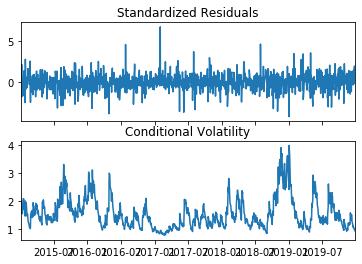

In [205]:
## TARCH with means
am = arch_model(100*CloseCloseData, p=1, o=1, q=1, power=1.0, dist='StudentsT')
res = am.fit()
res.plot()
res.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


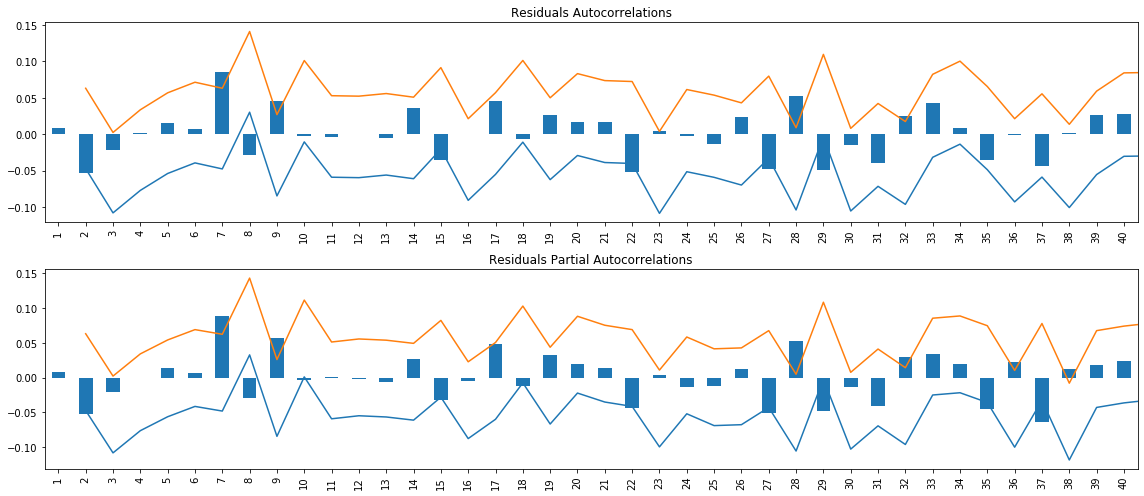

In [206]:
fig = plt.figure(figsize=(30,10))

confid_label = ['Lower Confidence', 'Upper Confidence']

ax1 = fig.add_subplot(211)
acf = sm.tsa.stattools.acf(res.resid.values.squeeze(), alpha=0.05)
acf = pd.concat([pd.DataFrame(acf[0], columns=['ACF']), pd.DataFrame(acf[1], columns=confid_label)], axis=1)
fig1 = acf['ACF'][1:].plot(kind='bar', title='Residuals Autocorrelations', figsize=(16,7), ax=ax1)
fig1 = fig1.plot(acf[1:][confid_label], label=confid_label)

ax2 = fig.add_subplot(212)
pacf = sm.tsa.stattools.pacf(res.resid.values.squeeze(), alpha=0.05)
pacf = pd.concat([pd.DataFrame(pacf[0], columns=['PACF']), pd.DataFrame(pacf[1], columns=confid_label)], axis=1)
fig2 = pacf['PACF'][1:].plot(kind='bar', title='Residuals Partial Autocorrelations', figsize=(16,7), ax=ax2)
fig2 = fig2.plot(pacf[1:][confid_label], label=confid_label)

plt.tight_layout()

In [208]:
r,q,p = sm.tsa.acf(res.resid.values.squeeze(), fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.007854   0.077784  0.780324
2.0  -0.052918   3.611745  0.164331
3.0  -0.021872   4.215966  0.239068
4.0   0.001399   4.218442  0.377249
5.0   0.015963   4.540809  0.474442
6.0   0.007693   4.615729  0.593954
7.0   0.085690  13.919404  0.052634
8.0  -0.029000  14.985873  0.059421
9.0   0.045294  17.589406  0.040247
10.0 -0.003141  17.601932  0.062061
11.0 -0.003761  17.619917  0.090829
12.0 -0.000162  17.619950  0.127727
13.0 -0.005189  17.654230  0.171095
14.0  0.035438  19.254454  0.155452
15.0 -0.034847  20.802958  0.143244
16.0  0.000905  20.804003  0.186168
17.0  0.045181  23.411268  0.136334
18.0 -0.006221  23.460734  0.173500
19.0  0.026969  24.391237  0.181570
20.0  0.017341  24.776275  0.210125
21.0  0.016061  25.106816  0.242567
22.0 -0.052505  28.642134  0.155364
23.0  0.004883  28.672735  0.191406
24.0 -0.002834  28.683052  0.232288
25.0 -0.013446  28.915488  0.267464
26.0  0.023295  29.613679  0

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2293.4312308813523
Iteration:      2,   Func. Count:     13,   Neg. LLF: 2293.246023134142
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2293.1673964280085
Iteration:      4,   Func. Count:     27,   Neg. LLF: 2292.6637805306964
Iteration:      5,   Func. Count:     34,   Neg. LLF: 2292.3552711380657
Iteration:      6,   Func. Count:     39,   Neg. LLF: 2292.10507243371
Iteration:      7,   Func. Count:     44,   Neg. LLF: 2291.874853151692
Iteration:      8,   Func. Count:     49,   Neg. LLF: 2291.84462033454
Iteration:      9,   Func. Count:     54,   Neg. LLF: 2291.842690236118
Iteration:     10,   Func. Count:     59,   Neg. LLF: 2291.8424665653206
Iteration:     11,   Func. Count:     64,   Neg. LLF: 2291.842454476042
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2291.8424536749017
            Iterations: 11
            Function evaluations: 65
            Gradient evaluation

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - EGARCH Model Results                       
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                     EGARCH   Log-Likelihood:               -2291.84
Distribution:                  Normal   AIC:                           4589.68
Method:            Maximum Likelihood   BIC:                           4605.10
                                        No. Observations:                 1258
Date:                Sun, Mar 15 2020   Df Residuals:                     1255
Time:                        00:35:02   Df Model:                            3
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0641  3.677e-02      1.745  8.105e-02 [-7.918e-03,  0.136]
alpha[1]       0.1660  5.745e-02      2.889  3.859e-03  [5.340e-02,  0.279]
beta[1]        0.9360  3.995e-02     23.430 2.103e-121    [  0.858,  1.014]
===========================================================================

Covariance estimator: robust
"""

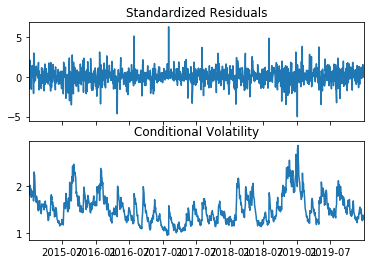

In [42]:
## Basic EGARCH with no mean
am = arch_model(100*CloseCloseData, mean='zero', vol='EGARCH')
res = am.fit()
res.plot()
res.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2286.732505775297
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2284.8787366038796
Iteration:      3,   Func. Count:     25,   Neg. LLF: 2284.266123213544
Iteration:      4,   Func. Count:     35,   Neg. LLF: 2284.233189617598
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2283.6208504807414
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2283.2111315013126
Iteration:      7,   Func. Count:     56,   Neg. LLF: 2282.788948514222
Iteration:      8,   Func. Count:     62,   Neg. LLF: 2282.675371099282
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2282.664114684286
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2282.6635939882517
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2282.6635801991824
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2282.6635793973887
            Iterations: 11
            Function evaluations: 81
            Gradient evaluati

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.003
Mean Model:             Constant Mean   Adj. R-squared:                 -0.003
Vol Model:                     EGARCH   Log-Likelihood:               -2282.66
Distribution:                  Normal   AIC:                           4573.33
Method:            Maximum Likelihood   BIC:                           4593.88
                                        No. Observations:                 1258
Date:                Sun, Mar 15 2020   Df Residuals:                     1254
Time:                        12:39:41   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1790  4.733e-02      3.781  1.562e-04 [8.619e-02,  0.272]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0723  3.706e-02      1.952  5.095e-02 [-2.983e-04,  0.145]
alpha[1]       0.2106  6.137e-02      3.432  5.994e-04  [9.033e-02,  0.331]
beta[1]        0.9278  3.967e-02     23.386 5.909e-121    [  0.850,  1.006]
===========================================================================

Covariance estimator: robust
"""

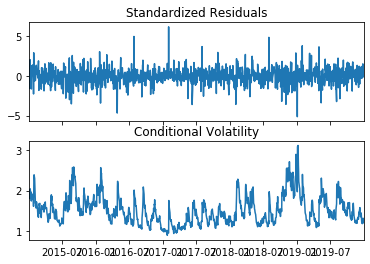

In [46]:
## Basic EGARCH with constant mean
am = arch_model(100*CloseCloseData, vol='EGARCH')
res = am.fit()
res.plot()
res.summary()